# A Statistical study over the wind power prodution in US from 2001-2023

This notebook aims to perform some basic analysis over the data provided in [this dataset](https://www.kaggle.com/datasets/henriupton/wind-power-production-us-2001-2023). Information about it says the information comes from official entities of the administration. Unfortunately, the dataset is also not clear about the unit of the quantities, so I'll assume kWh for good measure.

Disclaimer: please, bear in mind that I am not american, nor I live in the US. So the analysis here is based solely on the information from the dataset itself.

If you wish to run this notebook, please download the dataset from the link provided.

If you are in the original Kaggle page where the dataset was provived, the following change must be done:

change 
```
raw_df = pd.read_csv('wind-power-production-us.csv')
```

to 

```
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

raw_df = pd.read_csv('/kaggle/input/wind-power-production-us-2001-2023/wind-power-production-us.csv')
```

## First step: Exploring, understanding and cleaning the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
raw_df = pd.read_csv('wind-power-production-us.csv')
raw_df

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,6025,678,75,348,113,91,10,42,371,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,5310,599,77,293,103,83,9,35,338,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,5795,660,96,327,101,93,9,33,381,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,5827,593,92,277,106,81,9,27,361,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,5738,640,72,336,109,86,9,27,392,...,--,--,16,383,378,6,--,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Oct 2022,50478,998,89,377,287,105,76,64,1429,...,966,34,725,2456,1006,709,741,52,12,40
262,Nov 2022,56144,1084,83,488,224,139,58,93,1497,...,1345,71,935,2904,1284,785,835,80,15,65
263,Dec 2022,52394,1070,78,481,201,137,66,106,1443,...,1548,71,1143,2660,1207,698,756,62,14,48
264,Jan 2023,53152,983,80,429,217,118,64,75,1278,...,1681,78,922,2771,1381,687,703,43,12,31


In [4]:
raw_df.shape

(266, 126)

In [5]:
raw_df.dtypes

date                          object
other_united_states            int64
other_new_england              int64
other_connecticut              int64
other_maine                    int64
                               ...  
wind_oregon                    int64
wind_washington               object
wind_pacific_noncontiguous     int64
wind_alaska                   object
wind_hawaii                    int64
Length: 126, dtype: object

Some values are listed as "object" type where it should be numerical. Let's take a closer look.

In [6]:
raw_df['wind_washington'].tolist()

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '48',
 '21',
 '51',
 '35',
 '28',
 '33',
 '36',
 '31',
 '34',
 '26',
 '33',
 '42',
 '28',
 '35',
 '71',
 '76',
 '42',
 '74',
 '61',
 '55',
 '33',
 '42',
 '52',
 '33',
 '70',
 '59',
 '85',
 '62',
 '72',
 '48',
 '39',
 '47',
 '57',
 '65',
 '58',
 '75',
 '30',
 '23',
 '56',
 '42',
 '48',
 '63',
 '34',
 '38',
 '40',
 '44',
 '49',
 '31',
 '151',
 '81',
 '85',
 '77',
 '73',
 '59',
 '81',
 '53',
 '49',
 '63',
 '184',
 '82',
 '151',
 '155',
 '211',
 '197',
 '183',
 '211',
 '156',
 '200',
 '201',
 '206',
 '196',
 '372',
 '314',
 '297',
 '361',
 '375',
 '330',
 '397',
 '307',
 '297',
 '170',
 '238',
 '253',
 '319',
 '316',
 '144',
 '435',
 '322',
 '330',
 '356',
 '239',
 '345',
 '282',
 '307',
 '334',
 '161',
 '221',
 '130',
 '401',
 '619',
 '522',
 '519',
 '422',
 '471',
 '361',
 '348',
 '402',
 '329',
 '519',
 '484',
 '513',
 '745',
 '557',
 '637',
 '529',
 '572',
 '367',
 '497',
 '499',
 '342',
 '531',
 '511'

In [7]:
raw_df.isna().sum()

date                          0
other_united_states           0
other_new_england             0
other_connecticut             0
other_maine                   0
                             ..
wind_oregon                   0
wind_washington               0
wind_pacific_noncontiguous    0
wind_alaska                   0
wind_hawaii                   0
Length: 126, dtype: int64

There's no "nan" values. However, some lines have "--" in their values, which can be interpreted as NaN. Also, some numeric values were passed as strings.

To be safe, let's use regular expressions on everything to check if there's more odd values such as "--" or anything not-numerical at all.

(with a little help from https://regexr.com/ and chatGPT)

In [8]:
non_numerical_values = []

for col in raw_df.columns[1:]: #excludes the "date" column
    for item in raw_df[col]:
        if isinstance(item, str):
            val = re.findall("[^\d]", item) # capture anything that is not a (0-9) number
            val = "".join(val)
            if val not in non_numerical_values:
                non_numerical_values.append(val)

print(non_numerical_values)

['--', '', 'NM']


So, there's also some "NM" values. I didn't find anything on the publication telling what these "NM" suppose to be, but my best guess is "Not Measured". I will treat them as "NaN" values too. The empty values can be treated as NaN as well.

In [9]:
df_withna = raw_df.copy()

for col in df_withna.columns[1:]:
    df_withna.loc[(df_withna[col] == '--') | (df_withna[col] == 'NM') | (df_withna[col] == ''), col] = np.nan
    df_withna[col] = pd.to_numeric(df_withna[col]) # changing the "numeric as string" to numeric
    
df_withna

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,6025.0,678.0,75.0,348.0,113.0,91.0,10.0,42.0,371.0,...,NaN,NaN,26.0,137.0,133.0,3.0,NaN,0.0,0.0,0.0
1,Feb 2001,5310.0,599.0,77.0,293.0,103.0,83.0,9.0,35.0,338.0,...,NaN,NaN,23.0,151.0,148.0,3.0,NaN,0.0,0.0,0.0
2,Mar 2001,5795.0,660.0,96.0,327.0,101.0,93.0,9.0,33.0,381.0,...,NaN,NaN,22.0,308.0,300.0,8.0,NaN,0.0,0.0,0.0
3,Apr 2001,5827.0,593.0,92.0,277.0,106.0,81.0,9.0,27.0,361.0,...,NaN,NaN,13.0,399.0,393.0,6.0,NaN,0.0,0.0,0.0
4,May 2001,5738.0,640.0,72.0,336.0,109.0,86.0,9.0,27.0,392.0,...,NaN,NaN,16.0,383.0,378.0,6.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Oct 2022,50478.0,998.0,89.0,377.0,287.0,105.0,76.0,64.0,1429.0,...,966.0,34.0,725.0,2456.0,1006.0,709.0,741.0,52.0,12.0,40.0
262,Nov 2022,56144.0,1084.0,83.0,488.0,224.0,139.0,58.0,93.0,1497.0,...,1345.0,71.0,935.0,2904.0,1284.0,785.0,835.0,80.0,15.0,65.0
263,Dec 2022,52394.0,1070.0,78.0,481.0,201.0,137.0,66.0,106.0,1443.0,...,1548.0,71.0,1143.0,2660.0,1207.0,698.0,756.0,62.0,14.0,48.0
264,Jan 2023,53152.0,983.0,80.0,429.0,217.0,118.0,64.0,75.0,1278.0,...,1681.0,78.0,922.0,2771.0,1381.0,687.0,703.0,43.0,12.0,31.0


Next, it is a good idea to transform the "date" column in a datetime format.

In [10]:
df_withna['date'] = pd.to_datetime(df_withna.date, format='%b %Y')
df_withna

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,2001-01-01,6025.0,678.0,75.0,348.0,113.0,91.0,10.0,42.0,371.0,...,NaN,NaN,26.0,137.0,133.0,3.0,NaN,0.0,0.0,0.0
1,2001-02-01,5310.0,599.0,77.0,293.0,103.0,83.0,9.0,35.0,338.0,...,NaN,NaN,23.0,151.0,148.0,3.0,NaN,0.0,0.0,0.0
2,2001-03-01,5795.0,660.0,96.0,327.0,101.0,93.0,9.0,33.0,381.0,...,NaN,NaN,22.0,308.0,300.0,8.0,NaN,0.0,0.0,0.0
3,2001-04-01,5827.0,593.0,92.0,277.0,106.0,81.0,9.0,27.0,361.0,...,NaN,NaN,13.0,399.0,393.0,6.0,NaN,0.0,0.0,0.0
4,2001-05-01,5738.0,640.0,72.0,336.0,109.0,86.0,9.0,27.0,392.0,...,NaN,NaN,16.0,383.0,378.0,6.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022-10-01,50478.0,998.0,89.0,377.0,287.0,105.0,76.0,64.0,1429.0,...,966.0,34.0,725.0,2456.0,1006.0,709.0,741.0,52.0,12.0,40.0
262,2022-11-01,56144.0,1084.0,83.0,488.0,224.0,139.0,58.0,93.0,1497.0,...,1345.0,71.0,935.0,2904.0,1284.0,785.0,835.0,80.0,15.0,65.0
263,2022-12-01,52394.0,1070.0,78.0,481.0,201.0,137.0,66.0,106.0,1443.0,...,1548.0,71.0,1143.0,2660.0,1207.0,698.0,756.0,62.0,14.0,48.0
264,2023-01-01,53152.0,983.0,80.0,429.0,217.0,118.0,64.0,75.0,1278.0,...,1681.0,78.0,922.0,2771.0,1381.0,687.0,703.0,43.0,12.0,31.0


In [11]:
df_withna.dtypes

date                          datetime64[ns]
other_united_states                  float64
other_new_england                    float64
other_connecticut                    float64
other_maine                          float64
                                   ...      
wind_oregon                          float64
wind_washington                      float64
wind_pacific_noncontiguous           float64
wind_alaska                          float64
wind_hawaii                          float64
Length: 126, dtype: object

In [12]:
df_withna.isna().sum().sort_values(ascending=False)

wind                         266
wind_louisiana               266
wind_district_of_columbia    266
wind_georgia                 266
wind_alabama                 266
                            ... 
other_kentucky                 0
other_alabama                  0
other_east_south_central       0
other_west_virginia            0
wind_hawaii                    0
Length: 126, dtype: int64

In [13]:
col = df_withna.columns.tolist()
col.sort()

print(len(col))
col

126


['date',
 'other_alabama',
 'other_alaska',
 'other_arizona',
 'other_arkansas',
 'other_california',
 'other_colorado',
 'other_connecticut',
 'other_delaware',
 'other_district_of_columbia',
 'other_east_north_central',
 'other_east_south_central',
 'other_florida',
 'other_georgia',
 'other_hawaii',
 'other_idaho',
 'other_illinois',
 'other_indiana',
 'other_iowa',
 'other_kansas',
 'other_kentucky',
 'other_louisiana',
 'other_maine',
 'other_maryland',
 'other_massachusetts',
 'other_michigan',
 'other_middle_atlantic',
 'other_minnesota',
 'other_mississippi',
 'other_missouri',
 'other_montana',
 'other_mountain',
 'other_nebraska',
 'other_nevada',
 'other_new_england',
 'other_new_hampshire',
 'other_new_jersey',
 'other_new_mexico',
 'other_new_york',
 'other_north_carolina',
 'other_north_dakota',
 'other_ohio',
 'other_oklahoma',
 'other_oregon',
 'other_pacific_contiguous',
 'other_pacific_noncontiguous',
 'other_pennsylvania',
 'other_rhode_island',
 'other_south_atlanti

Some columns have no wind-related production at all. It makes sense, since not every state produces wind energy.

Also, there's some columns that seems to be agglomerates, such as 'wind_pacific_contiguous' and 'wind_west_north_central'.

Finally, there's a clear separation between "wind_" and "other_" which urges me to create two separated dataframes. So let's address these issues. The goal is the have two dataframes with 52 colmuns each: date and one for each state. Also, in this dataset, Washington D.C is refered as district_of_columbia.

In [14]:
us_states = [
'alabama',
'alaska',
'arizona',
'arkansas',
'california',
'colorado',
'connecticut',
'delaware',
'district_of_columbia',
'florida',
'georgia',
'hawaii',
'idaho',
'illinois',
'indiana',
'iowa',
'kansas',
'kentucky',
'louisiana',
'maine',
'maryland',
'massachusetts',
'michigan',
'minnesota',
'mississippi',
'missouri',
'montana',
'nebraska',
'nevada',
'new_hampshire',
'new_jersey',
'new_mexico',
'new_york',
'north_carolina',
'north_dakota',
'ohio',
'oklahoma',
'oregon',
'pennsylvania',
'rhode_island',
'south_carolina',
'south_dakota',
'tennessee',
'texas',
'utah',
'vermont',
'virginia',
'washington',
'west_virginia',
'wisconsin',
'wyoming',
]

df_others = df_withna[['date']].copy()
df_wind = df_withna[['date']].copy()

for item in us_states:
    df_others[item] = df_withna[f'other_{item}']
    df_wind[item] = df_withna[f'wind_{item}']

print(f'others: {df_others.shape}')
print(f'wind: {df_wind.shape}')

others: (266, 52)
wind: (266, 52)


## Second step: Statistical analysis

Great. Now that we have a more workable dataframe, let's search for some answers. The follwing questions popped up in my mind while writing this code. Hopefully, you can make different ones.

### Historical questions:
- [X] How many states produce wind power today?
- [X] How many states produce wind power in a specific moment in history?
- [ ] What was the first state to start producing?
- [ ] What was the last state to start producing?

### Overall production:
- [ ] The ratio of producers/total
- [ ] The ratio of producers/non-producers
- [ ] What's the average wind-power production over US?
- [ ] What's the average wind-power production over US per state?
- [X] Which state produces the most?
- [ ] Which state produces the least (considering that it produces at all)?
- [ ] How much wind-power is produced compared to other sources?

### Annual production:
- [ ] Which time of the year has the pick production overall? and by state?
- [ ] Which time of the year has the lowest production overall? and by state?

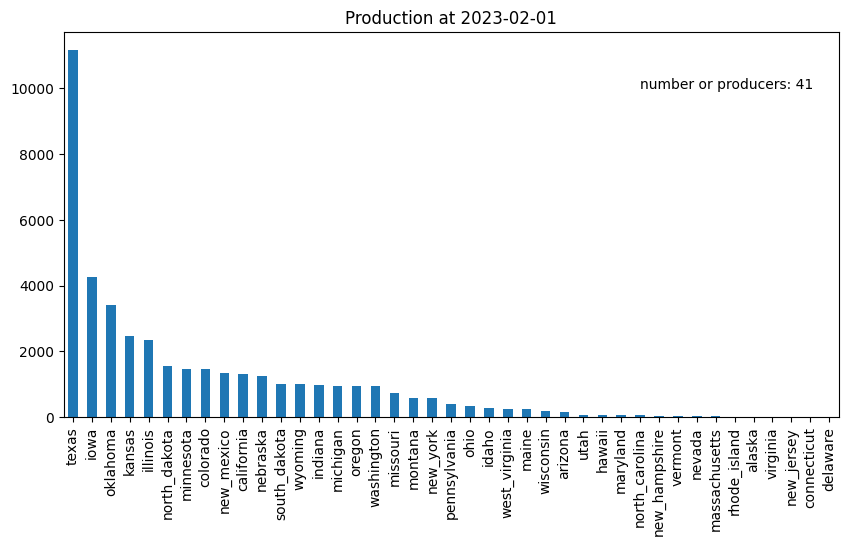

In [86]:
# Historical questions

most_recent_entry = df_wind.date.max()
oldest_entry = df_wind.date.min()

current_producers = df_wind.query('date == @most_recent_entry').dropna(axis=1).columns.tolist()[1:]
num_current_producers = len(current_producers)

df_wind.query('date == @most_recent_entry').\
    loc[:, current_producers].\
    transpose().\
    sort_values(by=df_wind.query('date == @most_recent_entry').index[0], ascending=False).\
    plot(kind='bar', figsize=(10,5), legend=False)

text = f'number or producers: {num_current_producers}'

plt.title(f'Production at {most_recent_entry.date()}');
plt.text(30, 10000, text);

This already answer two questions: who produces wind power today and who has the most production, but we'll go back to the last one latter.

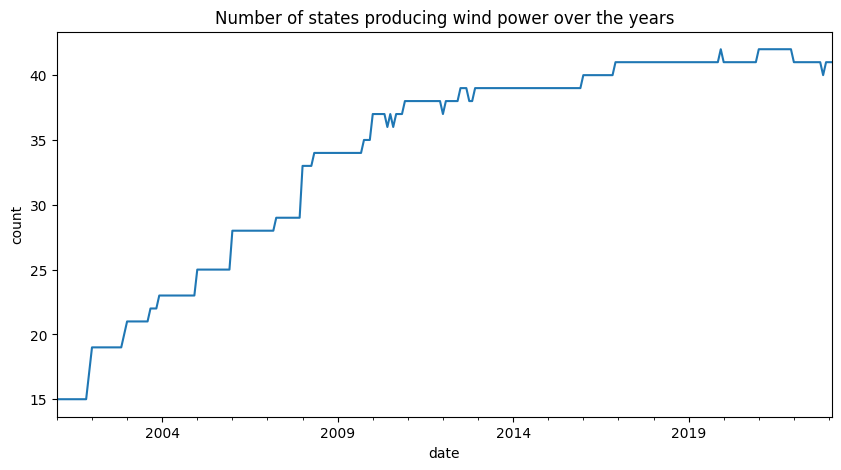

In [89]:
# How many states produce wind power in a specific moment in history?

df_wind.melt(id_vars='date', value_name='production', var_name='state').\
    groupby(by='date')['production'].count().plot(kind='line', figsize=(10,5));

plt.ylabel('count');
plt.title('Number of states producing wind power over the years');

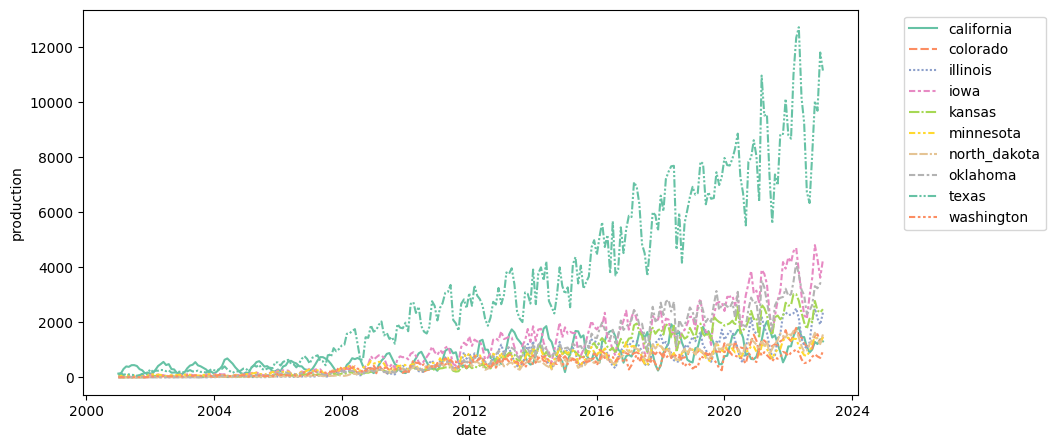

In [74]:
#Production over time for the biggest producers (another question)

aux_plot = df_wind.fillna(0.0).melt(id_vars='date', value_name='production', var_name='state')
biggest_producers = aux_plot.groupby(by='state')['production'].sum().sort_values(ascending=False)[:10].index.tolist()

plt.subplots(figsize=(10,5))
sns.lineplot(data = aux_plot.query('state in @biggest_producers'),
             x='date',
             y='production',
             hue='state',
             palette='Set2',
             style='state')

plt.legend(bbox_to_anchor=(1.05, 1));